I will work on a dataset that provides insightful information about what medications are advised to
people on their fever condition, based on their medical history and other relevant
factors. Data contains data about patients' health, environment, and lifestyle, so it
expresses real-world scenarios. The dataset has the following fields:
● Temperature;
● Fever_Severity;
● Age;
● Gender;
● BMI;
● Headache;
● Body_Ache;
● Fatigue;
● Chronic_Conditions;
● Allergies;
● Smoking_History;
● Alcohol_Consumption;
● Humidity;
● AQI;
● Physical_Activity;
● Diet_Type;
● Heart_Rate;
● Blood_Pressure;
● Previous_Medication;
● Recommended_Medication. The target column is Recommended_Medication.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.svm import SVC

# Start


## Importing and analyzing dataset

In [131]:
df = pd.read_csv('/content/data.csv')
df.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


In [132]:
df.columns

Index(['Temperature', 'Fever_Severity', 'Age', 'Gender', 'BMI', 'Headache',
       'Body_Ache', 'Fatigue', 'Chronic_Conditions', 'Allergies',
       'Smoking_History', 'Alcohol_Consumption', 'Humidity', 'AQI',
       'Physical_Activity', 'Diet_Type', 'Heart_Rate', 'Blood_Pressure',
       'Previous_Medication', 'Recommended_Medication'],
      dtype='object')

In [133]:
# convert column names to snake case to operate with them easier
df.columns = df.columns.str.lower()

In [134]:
# check for duplicate rows
df.duplicated().sum()

0

In [135]:
# check for duplicate columns
df.columns[df.T.duplicated()]

Index([], dtype='object')

In [136]:
# compute statistical insights
df.describe()

,temperature,age,bmi,humidity,aqi,heart_rate
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,38.09890,51.152000,26.44320,60.594400,248.493000,80.14400
std,1.13887,28.873354,4.90115,17.058475,143.705244,11.79196
min,36.00000,1.000000,18.00000,30.000000,0.000000,60.00000
25%,37.20000,26.000000,22.40000,46.600000,127.750000,70.00000
50%,38.20000,51.000000,26.50000,60.950000,247.500000,80.00000
75%,39.10000,76.000000,30.52500,74.725000,375.250000,90.00000
max,40.00000,100.000000,35.00000,90.000000,499.000000,100.00000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature             1000 non-null   float64
 1   fever_severity          1000 non-null   object 
 2   age                     1000 non-null   int64  
 3   gender                  1000 non-null   object 
 4   bmi                     1000 non-null   float64
 5   headache                1000 non-null   object 
 6   body_ache               1000 non-null   object 
 7   fatigue                 1000 non-null   object 
 8   chronic_conditions      1000 non-null   object 
 9   allergies               1000 non-null   object 
 10  smoking_history         1000 non-null   object 
 11  alcohol_consumption     1000 non-null   object 
 12  humidity                1000 non-null   float64
 13  aqi                     1000 non-null   int64  
 14  physical_activity       1000 non-null   o

In [138]:
# mapping column values from 'object' type to 'int64' type to operate with them for the ML and visualization part

for column in df.loc[:, df.columns != 'previous_medication']:
    mapping_dict = {}
    if df[column].dtype == 'object':
        unique_values = [value for value in df[column].unique()]
        mapping = {value: i for i, value in enumerate(df[column].unique())}
        mapping_dict[column] = mapping
        df[column] = df[column].replace(mapping)
df

<ipython-input-138-9f17b59b21f2>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(mapping)


,temperature,fever_severity,age,gender,bmi,headache,body_ache,fatigue,chronic_conditions,allergies,smoking_history,alcohol_consumption,humidity,aqi,physical_activity,diet_type,heart_rate,blood_pressure,previous_medication,recommended_medication
0,36.1,0,89,0,24.0,0,0,0,0,0,0,0,81.4,430,0,0,72,0,NaN,0
1,37.5,1,94,1,26.6,0,1,0,1,1,1,0,44.4,10,1,1,62,1,Ibuprofen,1
2,36.4,0,92,1,27.8,0,1,0,0,1,0,0,73.7,400,2,0,85,1,NaN,0
3,39.8,2,66,1,18.7,0,0,0,0,1,0,1,44.1,438,1,2,96,1,Ibuprofen,0
4,39.3,2,28,1,21.0,0,0,0,1,0,1,0,65.9,451,1,1,85,2,Paracetamol,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39.9,2,59,1,22.1,1,0,1,0,0,1,0,49.8,87,2,1,67,0,Ibuprofen,0
996,36.9,0,74,0,18.1,1,0,1,1,0,0,1,72.5,200,2,1,83,1,NaN,0
997,36.1,0,8,0,29.6,1,0,0,0,0,1,0,50.7,178,0,1,97,1,NaN,0
998,38.8,2,87,0,25.2,0,1,0,0,1,0,0,44.3,225,2,2,97,1,NaN,0


In [139]:
df['previous_medication'].value_counts()

,count
previous_medication,
Ibuprofen,259
Paracetamol,256
Aspirin,248


In [140]:
# will have a different approach with the 'previous_medication' column because it's the
# only one with missing values and the previous code maps the NaN values as well

mapping = {'Ibuprofen': 0, 'Paracetamol': 1, 'Aspirin': 2}
df['previous_medication'] = df['previous_medication'].replace(mapping)
df

<ipython-input-140-e2ab551617e1>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_medication'] = df['previous_medication'].replace(mapping)


,temperature,fever_severity,age,gender,bmi,headache,body_ache,fatigue,chronic_conditions,allergies,smoking_history,alcohol_consumption,humidity,aqi,physical_activity,diet_type,heart_rate,blood_pressure,previous_medication,recommended_medication
0,36.1,0,89,0,24.0,0,0,0,0,0,0,0,81.4,430,0,0,72,0,NaN,0
1,37.5,1,94,1,26.6,0,1,0,1,1,1,0,44.4,10,1,1,62,1,0.0,1
2,36.4,0,92,1,27.8,0,1,0,0,1,0,0,73.7,400,2,0,85,1,NaN,0
3,39.8,2,66,1,18.7,0,0,0,0,1,0,1,44.1,438,1,2,96,1,0.0,0
4,39.3,2,28,1,21.0,0,0,0,1,0,1,0,65.9,451,1,1,85,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39.9,2,59,1,22.1,1,0,1,0,0,1,0,49.8,87,2,1,67,0,0.0,0
996,36.9,0,74,0,18.1,1,0,1,1,0,0,1,72.5,200,2,1,83,1,NaN,0
997,36.1,0,8,0,29.6,1,0,0,0,0,1,0,50.7,178,0,1,97,1,NaN,0
998,38.8,2,87,0,25.2,0,1,0,0,1,0,0,44.3,225,2,2,97,1,NaN,0


## Dealing with missing values


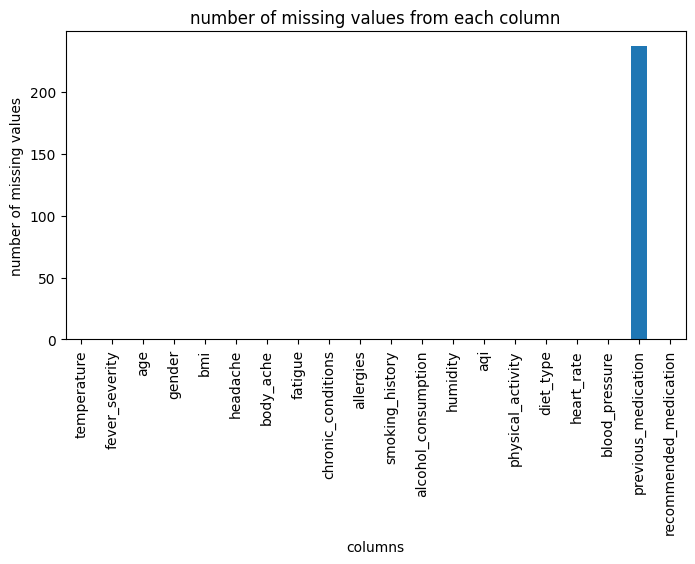

In [141]:
missing_values = df.isnull().sum()
missing_values.plot(kind='bar', figsize=(8, 4))
plt.title('number of missing values from each column')
plt.xlabel('columns')
plt.ylabel('number of missing values')
plt.show()


In this datset I would not consider deleting the missing values (because it's a small one), but would rather consider imputing them. First I'll try using SimpleImputer from sklearn.impute to do that

In [142]:
X = df.drop(columns=['recommended_medication'])
y = df['recommended_medication']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
X_train_imputed = imp_mean.transform(X_train)
X_test_imputed = imp_mean.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.81
Gaussian Naive Bayes Accuracy: 1.0
Decision Tree Classifier Accuracy: 1.0
Random Forest Accuracy: 1.0


As we can see, there's lots of overfitting in all models except Logistic Regression, which gives a an accuracy of 81%, kind of low for a medical prediction model. Let's try KNNI imputer


In [144]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)

df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

X = df_imputed.drop(columns=['recommended_medication'])
y = df_imputed['recommended_medication']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.81
Gaussian Naive Bayes Accuracy: 1.0
Decision Tree Classifier Accuracy: 1.0
Random Forest Accuracy: 1.0


Same result as for the SimpleImpute. If we check the correlation between the target column and other columns:


In [145]:
df.corr()['recommended_medication']


,recommended_medication
temperature,-0.187652
fever_severity,-0.153236
age,0.057521
gender,-0.010583
bmi,0.078333
headache,-0.017466
body_ache,-0.067733
fatigue,-0.044630
chronic_conditions,0.041680
allergies,-0.014431


we see that it's rather small. For this reason KNNI might not be the best choice, so I'll use SimpleImputer from now on (because it's designed for datasets with small correlation between its features).

In [146]:
# imputing data with simple imputer
simple_imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(simple_imputer.fit_transform(df), columns=df.columns)

In [147]:
df.isnull().sum()

,0
temperature,0
fever_severity,0
age,0
gender,0
bmi,0
headache,0
body_ache,0
fatigue,0
chronic_conditions,0
allergies,0


## Outliers

Lets try more methods for outlier detection

In [148]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

# Isolation Forest
iso = IsolationForest(random_state=42)
iso_outliers = iso.fit_predict(df)
iso_outliers_count = sum(iso_outliers == -1)

# One-Class SVM
svm = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
svm_outliers = svm.fit_predict(df)
svm_outliers_count = sum(svm_outliers == -1)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=5)
lof_outliers = lof.fit_predict(df)
lof_outliers_count = sum(lof_outliers == -1)

# Elliptic Envelope
ell = EllipticEnvelope(random_state=42)
ell_outliers = ell.fit_predict(df)
ell_outliers_count = sum(ell_outliers == -1)

# Print the number of outliers detected
print(f"Number of Outliers Detected (Isolation Forest): {iso_outliers_count}")
print(f"Number of Outliers Detected (One-Class SVM): {svm_outliers_count}")
print(f"Number of Outliers Detected (LOF): {lof_outliers_count}")
print(f"Number of Outliers Detected (Elliptic Envelope): {ell_outliers_count}")


Number of Outliers Detected (Isolation Forest): 1000
Number of Outliers Detected (One-Class SVM): 517
Number of Outliers Detected (LOF): 0
Number of Outliers Detected (Elliptic Envelope): 100


Based on the results, I am a little amazed to see 100% of the dataset is composed of outliers....I don't know what is going on so i'll try visualizing it through the classic sns plot




<Axes: >

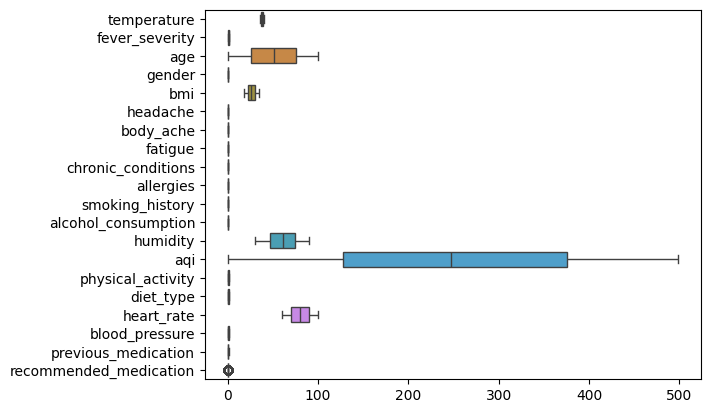

In [149]:
sns.boxplot(data=df, orient='h')

Well I suppose LOF was the best at doing it's job with detecting outliers. This is the most suitable method because it is specifically designed for small datasets and accounts for local density variations, making it effective for data with clusters.

## Feature Selection

I will select the most relevant features for this model with Kydavra and various selectors to see which one gives the best result in the accuracy of the model afterwards

In [150]:
pip install kydavra

In [151]:
from kydavra import PValueSelector, LassoSelector, PearsonCorrelationSelector, PointBiserialCorrSelector
pvalue = PValueSelector()
lasso = LassoSelector(),
pcs = PearsonCorrelationSelector(),
pbcs = PointBiserialCorrSelector()

selected_columns_pvalue = pvalue.select(df, 'recommended_medication')
selected_columns_lasso = pvalue.select(df, 'recommended_medication')
selected_columns_pcs = pvalue.select(df, 'recommended_medication')
selected_columns_pbcs = pvalue.select(df, 'recommended_medication')

print("P-Value Selector:", selected_columns_pvalue)
print("Lasso Selector:", selected_columns_lasso)
print("Pearson Correlation Selector:", selected_columns_pcs)
print("Point Biserial Correlation Selector:", selected_columns_pbcs)

P-Value Selector: ['fever_severity', 'age', 'bmi']
Lasso Selector: ['fever_severity', 'age', 'bmi']
Pearson Correlation Selector: ['fever_severity', 'age', 'bmi']
Point Biserial Correlation Selector: ['fever_severity', 'age', 'bmi']


Let's plot the relation between these features and the target column

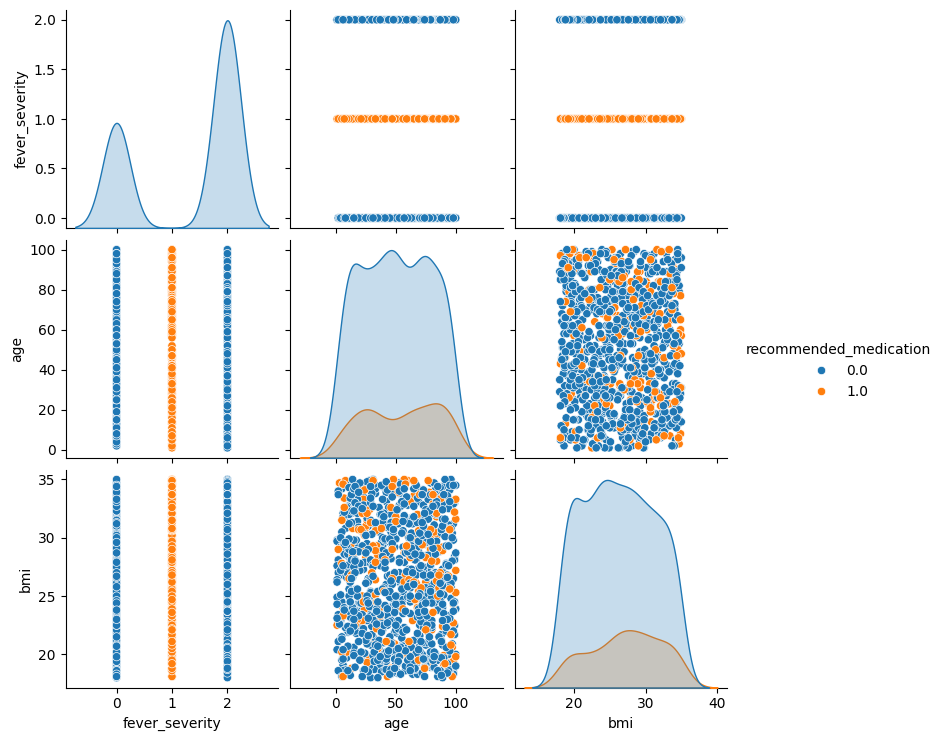

In [159]:
sns.pairplot(df[['fever_severity', 'age', 'bmi', 'recommended_medication']], hue='recommended_medication')


We can see that the recommended medication is mainly based on the fever tyoe (

All selectors chose the same columns, but I'll still choose to work with PValueSelector, because it's best for small datasets.

In [160]:
selected_columns = selected_columns_pvalue

## Try building the model (spoiler: kinda failed)

Based on all the data modifications and engineering I've done until now, I arrived at the point of build a model. I will try using more classification models: Random Forest, Logistic Regression, Support vector Classifier and K-Nearest Neighbours

In [161]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X = df[['fever_severity', 'age', 'bmi']]
y = df['recommended_medication']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Classifier": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Logistic Regression Accuracy: 0.825
Support Vector Classifier Accuracy: 0.825
K-Nearest Neighbors Accuracy: 0.8


Based on prior knowledge, Logistic Regression is the best model for a small dataset, because of its simplicity and interpretability. However, SVC scorred as much as that, maybe indicating a complex relation between the features. As expected, Random forest and Decision Tree classifiers are very prone to overfiting in small datasets.

### Back to feature selection

Lets Try a feature selection and classification pipeline using Recursive Feature Elimination (RFE) and a Decision Tree Classifier which evaluates the pipeline's performance using repeated stratified k-fold cross-validation (in this particular case selects the top 5 features iteratively by recursively removing the least important ones)

In [162]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Classifier": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    print(f"{model_name} Accuracy: {mean(n_scores):.3f} ({std(n_scores):.3f})")

Decision Tree Accuracy: 0.886 (0.033)
Random Forest Accuracy: 0.929 (0.026)
Logistic Regression Accuracy: 0.806 (0.044)
Support Vector Classifier Accuracy: 0.924 (0.025)
K-Nearest Neighbors Accuracy: 0.926 (0.024)


Now it's a more realistic result. The pipeline was the best at identifying the best features, and the KNN model gave the best accuracy, which could be due to the data having simple or well-defined clusters, as well as clear, separable classes. Well done